In [124]:
import numpy as np
import pandas as pd
%matplotlib inline

In [125]:
twits = pd.read_csv('tweets.csv')
states = pd.read_csv('states.csv',header=None)

In [126]:
states = states[0].apply(lambda x: ' '+x+' ')

In [127]:
#Gather mentioned state names to a list
def mention_state(s):
    st = [x for x in states if x in s]
    return st
twits['st_mentioned'] = twits['text'].apply(lambda x: mention_state(x))

In [128]:
#Explode list of multiple states into multiple rows, and count mentions
rows = []
_ = twits.apply(lambda row: [rows.append([row['handle'], nn]) 
                         for nn in row['st_mentioned']], axis=1)
df_new = pd.DataFrame(rows).set_index([0])
df_new = df_new.reset_index()
df_new.columns = ['handle','State']
mentioned_count = df_new.groupby(['handle','State'])['State'].count()
df = pd.DataFrame(mentioned_count)
df.columns = ['count']

In [129]:
#Vote power dataset from https://wallethub.com/edu/how-much-is-your-vote-worth/7932/#methodology
vote_power = pd.read_csv('vote_power.csv')
vote_power['State'] = vote_power['State'].apply(lambda x: ' '+x+' ')

In [130]:
#Join vote power to twitter mentions
flat_df = df.unstack(level=0).reset_index()
flat_df.columns = ['State','HillaryClinton','realDonaldTrump']
final = flat_df.merge(vote_power,on='State')
final.sort_values(by='Rank')

,State,HillaryClinton,realDonaldTrump,Rank,Vote Power
1,Arizona,NaN,10.0,1,207.05
13,Iowa,1.0,32.0,2,189.88
29,Ohio,4.0,22.0,5,141.06
23,Nevada,NaN,10.0,6,138.24
24,New Hampshire,1.0,16.0,7,122.18
28,North Carolina,2.0,6.0,8,119.15
8,Georgia,NaN,1.0,9,109.12
7,Florida,2.0,20.0,10,105.82
21,Missouri,NaN,2.0,11,94.65
17,Maine,NaN,1.0,13,87.19


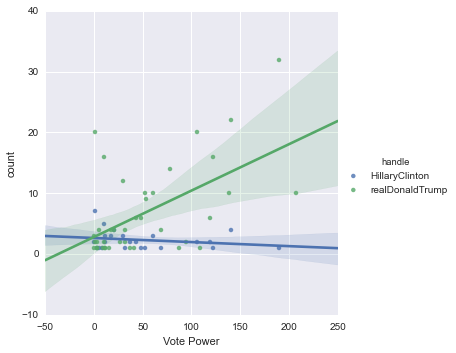

In [140]:
#Plot the regression graph
import seaborn as sns
df = df.reset_index()
df.columns = ['handle','State','count']
plot_df = df.merge(vote_power,on='State')
sns.lmplot("Vote Power", "count", data=plot_df, hue='handle')

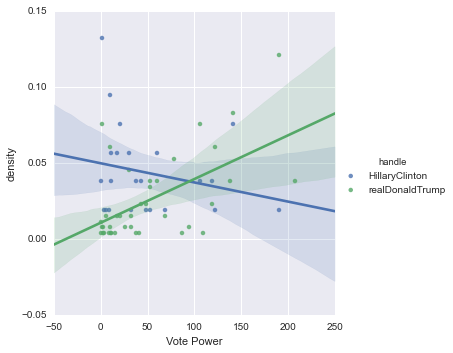

In [149]:
#Normalize the absolute mention frequency to density
trump_total = final['realDonaldTrump'].sum()
clinton_total = final['HillaryClinton'].sum()
df['density'] = df.apply(lambda x: x['count']/float(trump_total) if x[
        'handle']=='realDonaldTrump' else x['count']/float(clinton_total), axis=1)
density_df = df.merge(vote_power,on='State')
sns.lmplot("Vote Power", "density", data=density_df, hue='handle')